In [1]:
import pandas as pd
import urllib as ul

import seaborn as sns

# from Bio import Entrez

**Part Two [25 marks]**

 - 15 marks for successfully completing the tasks.
 - up to 6 marks for including one additional piece of analysis.
 - up to 4 marks for exceptionally well organised and executed approach.

Next we want to look at some of the functional terms that have been annotated to SFARI genes separating them out by their gene-score.

## Task 1

Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier) (2 marks). 

In [2]:
SFARI_gene = pd.read_csv('SFARI-Gene_genes_10-29-2020release_11-22-2020export.csv')

print(len(SFARI_gene))
SFARI_gene.head()
# SFARI_gene.loc[SFARI_gene.duplicated(subset = ['gene-symbol'])]

992


,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


I used the Gene information of Homo Sapiens which was found here: 

https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz 

to link the gene symbols to the gene IDs. 

In [3]:
# retrieve the Homo_sapiens file
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info.gz')

Homo = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')

Homo.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20201124,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20201124,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20201124,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20201124,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20201124,-


In [4]:
Map = pd.merge(SFARI_gene, Homo, left_on = 'gene-symbol', right_on = 'Symbol')
Map = pd.DataFrame(Map, columns = ['GeneID', 'gene-symbol', 'gene-score'])

print(len(Map))
Map.head()

985


,GeneID,gene-symbol,gene-score
0,18,ABAT,3.0
1,10349,ABCA10,3.0
2,154664,ABCA13,3.0
3,10347,ABCA7,3.0
4,1636,ACE,3.0


Find genes that are in the not in the *SFARI-Gene_genes_10-29-2020release_11-22-2020export.csv* file but bot in the *Homo_sapiens.gene_info.gz* file. 

In [5]:
for i in range(len(SFARI_gene)):
    if SFARI_gene.loc[i, 'gene-symbol'] not in list(Map['gene-symbol']):
        print(SFARI_gene.loc[i, ['gene-symbol', 'gene-score']])

gene-symbol    CASC4
gene-score         3
Name: 118, dtype: object
gene-symbol    FAM92B
gene-score          2
Name: 298, dtype: object
gene-symbol    MSNP1AS
gene-score           2
Name: 520, dtype: object
gene-symbol    NOTCH2NL
gene-score            3
Name: 574, dtype: object
gene-symbol    RP11-1407O15.2
gene-score                  3
Name: 749, dtype: object
gene-symbol    RPS10P2-AS1
gene-score               2
Name: 765, dtype: object
gene-symbol    SSPO
gene-score        3
Name: 837, dtype: object
gene-symbol    TTC25
gene-score         3
Name: 948, dtype: object


In [6]:
Map = Map.append({'GeneID': 113201, 'gene-symbol': 'CASC4', 'gene-score': 3}, ignore_index=True)
Map = Map.append({'GeneID': 339145, 'gene-symbol': 'FAM92B', 'gene-score': 2}, ignore_index=True)
Map = Map.append({'GeneID': 4479, 'gene-symbol': 'MSNP1AS', 'gene-score': 2}, ignore_index=True)
Map = Map.append({'GeneID': 388677, 'gene-symbol': 'NOTCH2NL', 'gene-score': 3}, ignore_index=True)
Map = Map.append({'GeneID': 26121, 'gene-symbol': 'RP11-1407O15.2', 'gene-score': 3}, ignore_index=True)
Map = Map.append({'GeneID': 140758, 'gene-symbol': 'RPS10P2-AS1', 'gene-score': 2}, ignore_index=True)
Map = Map.append({'GeneID': 23145, 'gene-symbol': 'SSPO', 'gene-score': 3}, ignore_index=True)
Map = Map.append({'GeneID': 83538, 'gene-symbol': 'TTC25', 'gene-score': 3}, ignore_index=True)
print(len(Map))
Map.head()

993


,GeneID,gene-symbol,gene-score
0,18,ABAT,3.0
1,10349,ABCA10,3.0
2,154664,ABCA13,3.0
3,10347,ABCA7,3.0
4,1636,ACE,3.0


In [7]:
Map.loc[Map.duplicated(subset = ['gene-symbol'])]

,GeneID,gene-symbol,gene-score
508,51072,MEMO1,3.0


There is also a duplicated data row

In [8]:
Map.loc[Map['gene-symbol'] == 'MEMO1']

,GeneID,gene-symbol,gene-score
507,7795,MEMO1,3.0
508,51072,MEMO1,3.0


In [9]:
Map.to_csv('Mapped_IDs.csv')

## Task 2

Using the gene2go file from NCBI that we worked with in week 8 find the Gene Ontology terms that have been annotated to all of the SFARI genes (4marks).

In [10]:
# retrieve the gene2go file
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz','gene2go.gz')

gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')

gene2go.head()

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,3702,814629,GO:0005634,ISM,-,nucleus,-,Component
1,3702,814629,GO:0008150,ND,-,biological_process,-,Process
2,3702,814630,GO:0003700,ISS,-,DNA-binding transcription factor activity,11118137,Function
3,3702,814630,GO:0005634,ISM,-,nucleus,-,Component
4,3702,814630,GO:0006355,TAS,-,"regulation of transcription, DNA-templated",11118137,Process


In [11]:
GO_terms = pd.merge(Map, gene2go, on = 'GeneID')
# GO_terms = pd.DataFrame(GO_terms, columns = ['GeneID', 'gene-symbol', 'GO_term', 'gene-score']).drop_duplicates().groupby('GeneID')
GO_terms = pd.DataFrame(GO_terms, columns = ['GeneID', 'GO_ID', 'gene-symbol', 'GO_term', 'gene-score'])

print(len(GO_terms))
# GO_terms.head()
GO_terms.loc[GO_terms.duplicated()]

26969


,GeneID,GO_ID,gene-symbol,GO_term,gene-score
3,18,GO:0005739,ABAT,mitochondrion,3.0
4,18,GO:0005739,ABAT,mitochondrion,3.0
16,18,GO:0030170,ABAT,pyridoxal phosphate binding,3.0
68,10347,GO:0005886,ABCA7,plasma membrane,3.0
83,10347,GO:0033344,ABCA7,cholesterol efflux,3.0
...,...,...,...,...,...
26925,26121,GO:0005654,RP11-1407O15.2,nucleoplasm,3.0
26928,26121,GO:0005687,RP11-1407O15.2,U4 snRNP,3.0
26930,26121,GO:0005690,RP11-1407O15.2,U4atac snRNP,3.0
26946,23145,GO:0005615,SSPO,extracellular space,3.0


In [12]:
gene2go.loc[gene2go['GeneID'] == 18]

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
636787,9606,18,GO:0001666,IEA,-,response to hypoxia,-,Process
636788,9606,18,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
636789,9606,18,GO:0005739,IBA,-,mitochondrion,21873635,Component
636790,9606,18,GO:0005739,IDA,-,mitochondrion,-,Component
636791,9606,18,GO:0005739,ISS,-,mitochondrion,-,Component
636792,9606,18,GO:0005759,TAS,-,mitochondrial matrix,-,Component
636793,9606,18,GO:0007568,IEA,-,aging,-,Process
636794,9606,18,GO:0007620,IEA,-,copulation,-,Process
636795,9606,18,GO:0007626,IEA,-,locomotory behavior,-,Process
636796,9606,18,GO:0009448,IDA,-,gamma-aminobutyric acid metabolic process,15528998,Process


In [13]:
GO_terms = GO_terms.drop_duplicates()
print(len(GO_terms))
GO_terms.head()

23665


,GeneID,GO_ID,gene-symbol,GO_term,gene-score
0,18,GO:0001666,ABAT,response to hypoxia,3.0
1,18,GO:0003867,ABAT,4-aminobutyrate transaminase activity,3.0
2,18,GO:0005739,ABAT,mitochondrion,3.0
5,18,GO:0005759,ABAT,mitochondrial matrix,3.0
6,18,GO:0007568,ABAT,aging,3.0


## Task 3

Now split the genes up into three lists by their SFARI gene-score (1 mark).

In [14]:
GO_terms_split = GO_terms.groupby('gene-score')

GO_terms_1 = GO_terms_split.get_group(1)
GO_terms_2 = GO_terms_split.get_group(2)
GO_terms_3 = GO_terms_split.get_group(3)

GO_terms_1.head()

,GeneID,GO_ID,gene-symbol,GO_term,gene-score
553,23394,GO:0000785,ADNP,chromatin,1.0
554,23394,GO:0000981,ADNP,"DNA-binding transcription factor activity, RNA...",1.0
555,23394,GO:0003677,ADNP,DNA binding,1.0
556,23394,GO:0005507,ADNP,copper ion binding,1.0
557,23394,GO:0005515,ADNP,protein binding,1.0


In [15]:
GO_terms_1.to_csv('GO_terms_1.csv')
GO_terms_2.to_csv('GO_terms_2.csv')
GO_terms_3.to_csv('GO_terms_3.csv')

## Task 4

Create tables of the 10 most commonly annotated terms for each gene list. The tables should have the following columns: GO term ID, GO term Description, GO term count (3 marks).

In [16]:
# gene-score: 1
GO_top10_1 = pd.merge(pd.DataFrame(GO_terms_1, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_1.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()
# pd.DataFrame(GO_terms_1.value_counts('GO_term'), columns = ['GO_term_count']).iloc[1:11]

GO_top10_1.to_csv('GO_1.csv')
GO_top10_1.iloc[0:10]

,GO_ID,GO_term,GO_term_count
230,GO:0005515,protein binding,150
333,GO:0005634,nucleus,106
1167,GO:0005654,nucleoplasm,84
576,GO:0005829,cytosol,66
813,GO:0005886,plasma membrane,58
398,GO:0005737,cytoplasm,55
460,GO:0006357,regulation of transcription by RNA polymerase II,45
1530,GO:0046872,metal ion binding,42
1501,GO:0045944,positive regulation of transcription by RNA po...,38
1,GO:0000785,chromatin,38


In [17]:
# gene-score: 2
GO_top10_2 = pd.merge(pd.DataFrame(GO_terms_2, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_2.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()

GO_top10_2.to_csv('GO_2.csv')
GO_top10_2.iloc[0:10]

,GO_ID,GO_term,GO_term_count
117,GO:0005515,protein binding,137
297,GO:0005886,plasma membrane,76
240,GO:0005634,nucleus,71
554,GO:0005829,cytosol,68
756,GO:0005737,cytoplasm,62
1000,GO:0005654,nucleoplasm,56
879,GO:0016021,integral component of membrane,33
405,GO:0016020,membrane,32
816,GO:0005887,integral component of plasma membrane,31
1054,GO:0070062,extracellular exosome,27


In [18]:
# gene-score: 3
GO_top10_3 = pd.merge(pd.DataFrame(GO_terms_3, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_3.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()

GO_top10_3.to_csv('GO_3.csv')
GO_top10_3.iloc[0:10]

,GO_ID,GO_term,GO_term_count
1642,GO:0005515,protein binding,333
519,GO:0005886,plasma membrane,179
1988,GO:0005829,cytosol,141
1686,GO:0005634,nucleus,126
1885,GO:0005737,cytoplasm,122
2484,GO:0005654,nucleoplasm,103
417,GO:0016021,integral component of membrane,89
2251,GO:0005887,integral component of plasma membrane,82
2805,GO:0016020,membrane,67
222,GO:0046872,metal ion binding,67


## Task 5

Take the three lists of UIDs created above and use the PantherDB tool - http://pantherdb.org/ to perform a “Functional classification viewed in graphic charts” analysis reporting and select the “Bar chart” display option, using default settings. Once on the results page displaying the bar chart use the pull-down menu to change the ontology to “Biological Process”. Click the small (!) “export” button to download the results as a text file and us this to make your own bar chart (5 marks).

In [19]:
UID_list = Map.groupby('gene-score')

UID_list_1 = pd.DataFrame(UID_list.get_group(1), columns = ['GeneID'])
UID_list_1.to_csv('UID_list_1.csv')

UID_list_2 = pd.DataFrame(UID_list.get_group(2), columns = ['GeneID'])
UID_list_2.to_csv('UID_list_2.csv')

UID_list_2 = pd.DataFrame(UID_list.get_group(3), columns = ['GeneID'])
UID_list_2.to_csv('UID_list_3.csv')

In [20]:
data_1 = pd.DataFrame(pd.read_csv('BarChart1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_1 = data_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_3 = pd.DataFrame(pd.read_csv('BarChart3.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_3 = data_3.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,developmental process (GO:0032502),21,9.5%,4.7%
1,multicellular organismal process (GO:0032501),23,10.4%,5.2%
2,cellular process (GO:0009987),99,44.6%,22.3%
3,reproduction (GO:0000003),2,0.9%,0.5%
4,cell population proliferation (GO:0008283),3,1.4%,0.7%


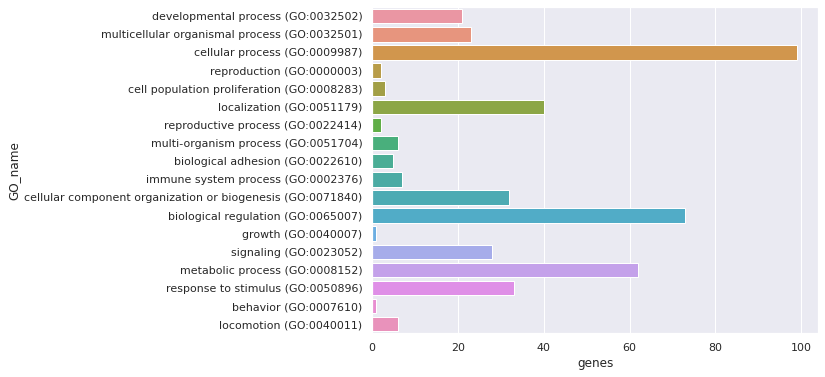

In [21]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_1, x = 'genes', y = 'GO_name', orient = 'h')

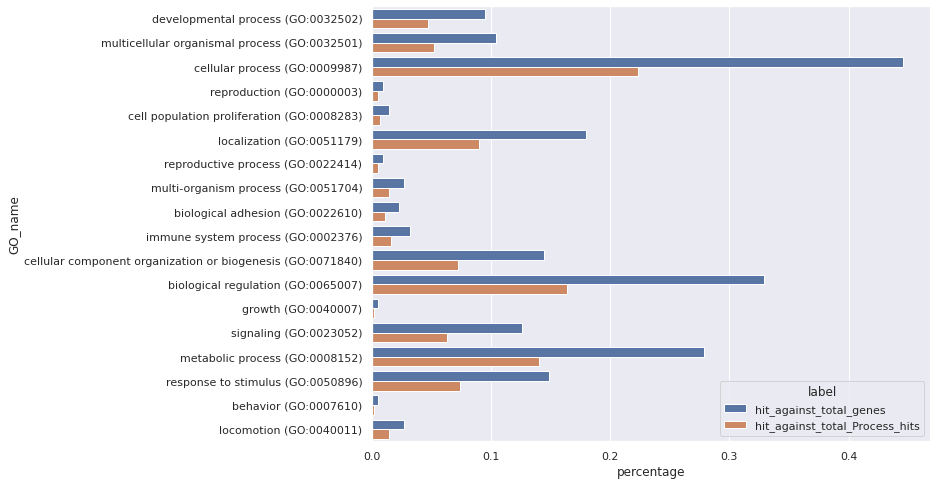

In [22]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_1_percent = data_1.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_1_percent['percentage'] = data_1_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_1_percent, x = 'percentage', y = 'GO_name', hue = 'label')

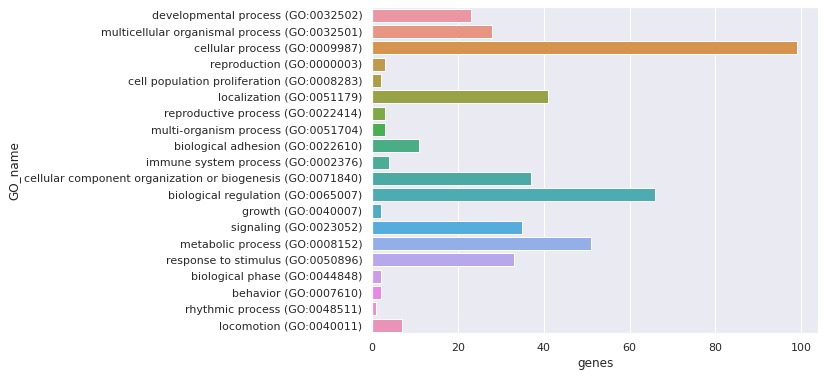

In [23]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_2, x = 'genes', y = 'GO_name', orient = 'h')

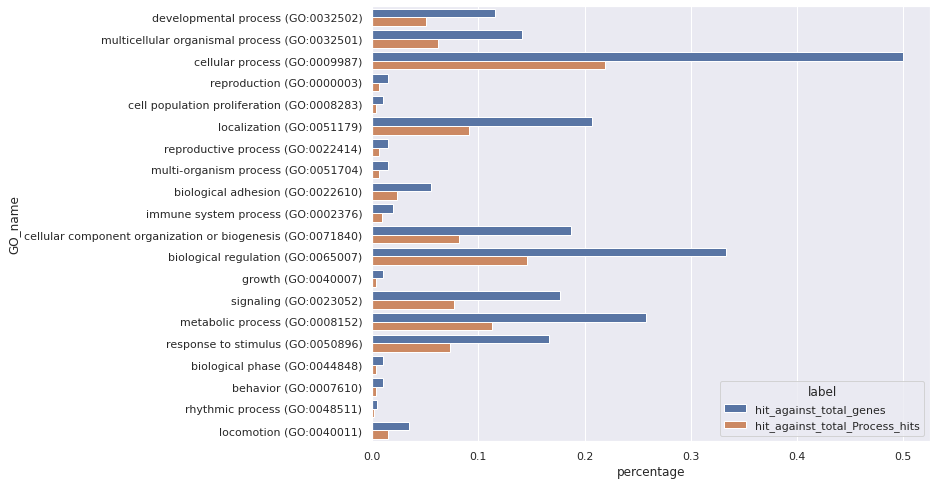

In [24]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_2_percent = data_2.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_2_percent['percentage'] = data_2_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_2_percent, x = 'percentage', y = 'GO_name', hue = 'label')

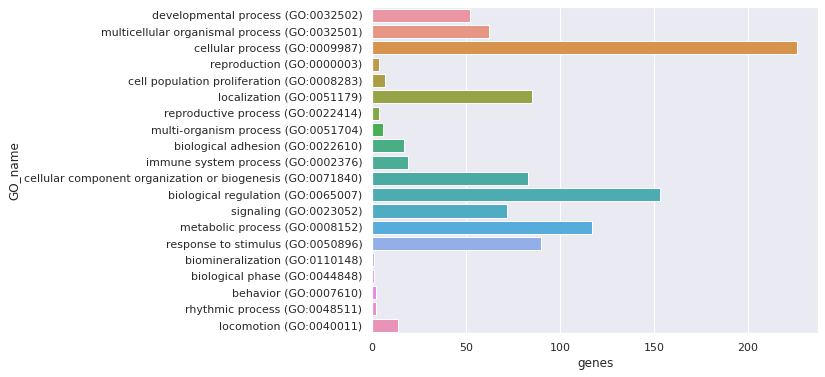

In [25]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_3, x = 'genes', y = 'GO_name', orient = 'h')

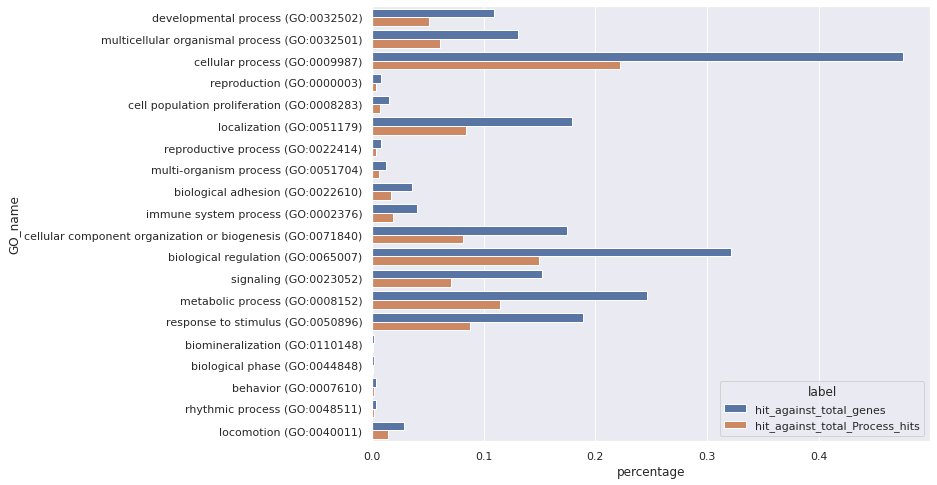

In [26]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_3_percent = data_3.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_3_percent['percentage'] = data_3_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_3_percent, x = 'percentage', y = 'GO_name', hue = 'label')

From the discussion: 

The GO IDs/terms don't match the ones I've found in task 4: e.g. my task 4 terms are much more granular whereas the pantherDB terms are quite broad,

## Requirement

Compare and contrast your results from Tasks 4 and 5 and any differences you find between the gene lists from the different gene-score categories in the SFARI gene lists. What can you say about Autism genes based on the results from these analyses?

Possible extensions here might be to explore other pathway analysis tools and websites such as KEGG and Reactome. You could also chose to perform a statistical analysis directly on the results from Task 4.

## Conclusion

Firstly, as was discussed in 3.2.1, there are genes that can not be mapped from the gene-info file using the gene symbols. Since each gene has only one unique UID, and many genes have aliases of pseudonyms, it is better to use UIDs instead of gene names and symbols. However, this may cause some trouble because the UID is used only in the NCBI database(You cannot use it on UniProt search for example), so it may depends on where and how the data set is used. 

Secondly, as can tell from the results in 3.2.4 and 3.2.5, and also mentioned in the discuss forum, the GO terms in task 5 don't match the ones found in task 4. The ones in task 4 are much more granular whereas the pantherDB terms are quite broad. It is because that those terms fond in task 5 are actually the parent terms of those in task 4 and if you click on the graph on the website, you will be able to get the children terms. 

From task 4 and 5 in this part, the GO terms of each gene score are quit similar except with slightly different number of hits. The genes with a score 1 has the most hit rate, then follows gene score 2 while the genes with a score 3 has the least considering from 3.2.3 that the number of genes in gene score 3 list is 2.5 times as large as that of gene score 1 and 2. And the percentage of the gene hits against the total gene list is always about half the percentage of gene hits against the total process. 

It can also tell that, the genes related to Autism are probably also related to cellular process, biological regulation and metabolic process since these terms has much more hits in all 3 gene score categories. 

Another finding is that, while submitting the gene lists in the website, the total genes shown on the website was always larger than the number of genes in the file. After some searching and testing, It is clear that: “If for the biological process more genes are observed in the test list than expected, you have an over-representation of genes involved in induction of apoptosis. If fewer genes are observed than expected, you have an under-representation."